In [12]:
import mpf_py  # Assuming mpf_py.MPF is available
from utils import gen_data, plot_2d_model_predictions, true_model3  # Adjust import according to your project structure
import numpy as np

x_train, y_train = gen_data(n=5000, seed=3, model=true_model3)
x_test, y_test = gen_data(n=5000, seed=4, model=true_model3)


In [13]:

# Fit the best MPF model with identified=True
best_params = {'epochs': 3,
 'n_iter': 28,
 'split_try': 16,
 'n_trees': 40,
 'colsample_bytree': 1.0,
 'identification_strategy': 'l2',
 'combination_strategy': 'arith_mean',
 'reproject_grid_values': False
}
model_arith_mean, _ = mpf_py.MPF.fit_boosted(
    x_train, y_train,
    **best_params
)

best_params['combination_strategy'] = 'median'
model_median, _ = mpf_py.MPF.fit_boosted(
    x_train, y_train,
    **best_params
)


Fitting boosted model with hyperparameters: MPFBoostedParams { epochs: 3, tgf_params: TreeGridFamilyBoostedParams { n_trees: 40, bootstrap: false, tg_params: TreeGridParams { n_iter: 28, split_strategy_params: RandomSplit { split_try: 16, colsample_bytree: 1.0 }, reproject_grid_values: false, identification_strategy_params: L2 }, combination_strategy: ArithMean }, seed: 42 }
reference: 0.5147211594275073
Combining 40 tree grids into a single tree grid.
Inner product: 53.10514610682334
Inner product: 8.24759105634148
Inner product: 50.87996904570012
Inner product: 9.379084021693068
Inner product: 50.778360936721256
Inner product: 9.365591468205057
Inner product: 49.16728741246316
Inner product: 9.30440057789538
Inner product: 50.76726246284189
Inner product: 8.26959404404451
Inner product: 48.59499989764156
Inner product: 10.337976178349635
Inner product: 51.85423459689619
Inner product: 9.255185800015132
Inner product: 49.87526797702388
Inner product: 9.41394758894971
Inner product: 51

In [14]:
# Make predictions
predictions_arith_mean = model_arith_mean.predict(x_test)
test_error_arith_mean = np.mean((y_test - predictions_arith_mean) ** 2)
print(f"Test MSE: {test_error_arith_mean}")

predictions_median = model_median.predict(x_test)
test_error_median = np.mean((y_test - predictions_median) ** 2)
print(f"Test MSE: {test_error_median}")


68997675034
Inner product: 24.396482274959304
Inner product: 14.838246079633073
Inner product: 22.435698963644647
Inner product: 16.022997247444838
Inner product: 21.96365159562475
Inner product: 17.0197624755004
Inner product: 24.92004045570416
Inner product: 16.304480970428692
Inner product: 24.473775401700085
Inner product: 14.576208864763164
Inner product: 22.394825352684713
Inner product: 12.979919699270436
Inner product: 22.271534181555367
Inner product: 15.319725103384604
Inner product: 21.991363349148223
Inner product: 14.665411685664624
Inner product: 24.638864564813638
Inner product: 13.877910544667118
Inner product: 23.15393140612412
Inner product: 14.662011179762699
Inner product: 21.985256934255936
Inner product: 16.606193729679195
Inner product: 24.40804121946483
Inner product: 15.332415086864073
Inner product: 21.762799001224256
Inner product: 16.445651472340522
Inner product: 24.384444245189155
Inner product: 14.561600755830154
Inner product: 21.260643727485856
Inner pr

Test MSE: 0.2691591393954452
Test MSE: 0.2736079039408604


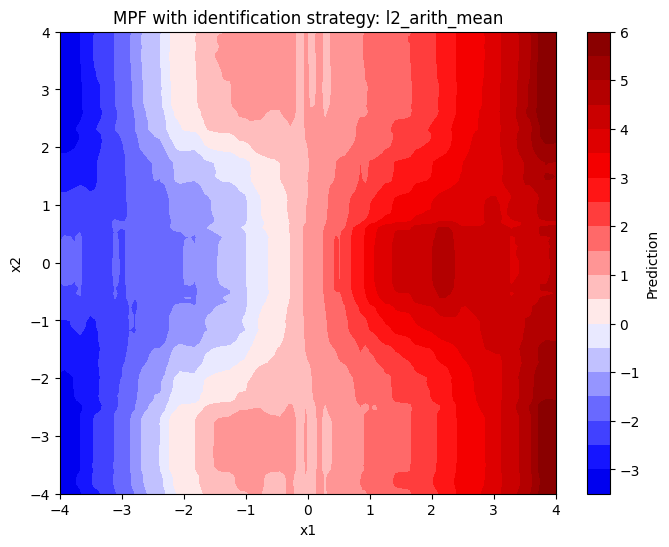

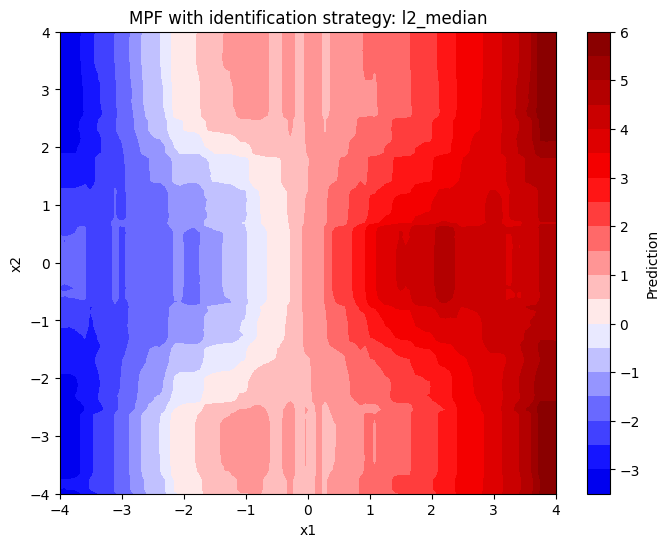

In [15]:

plot_2d_model_predictions(lambda x: model_arith_mean.predict(x), title="MPF with identification strategy: l2_arith_mean")
plot_2d_model_predictions(lambda x: model_median.predict(x), title="MPF with identification strategy: l2_median")


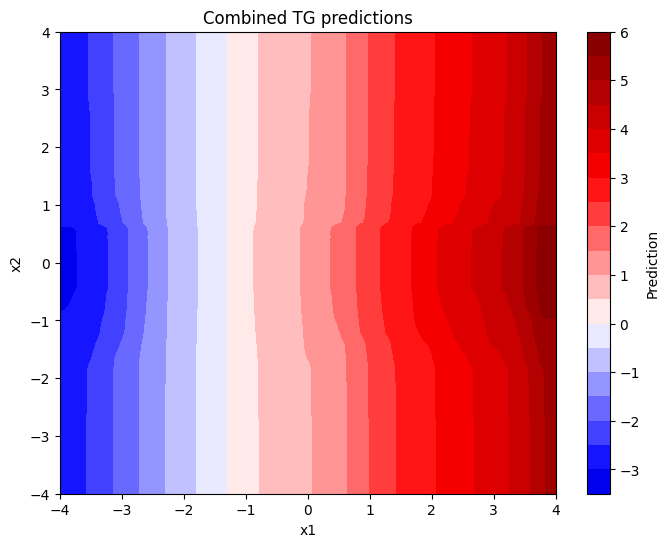

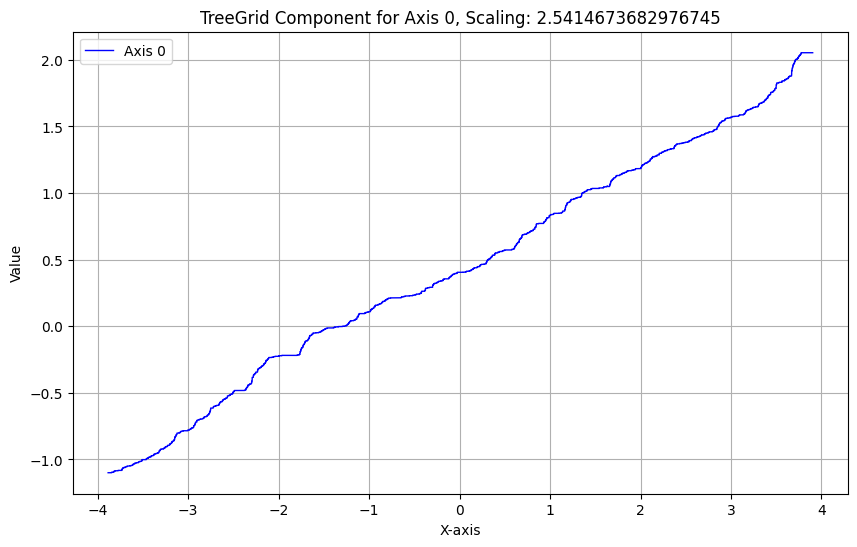

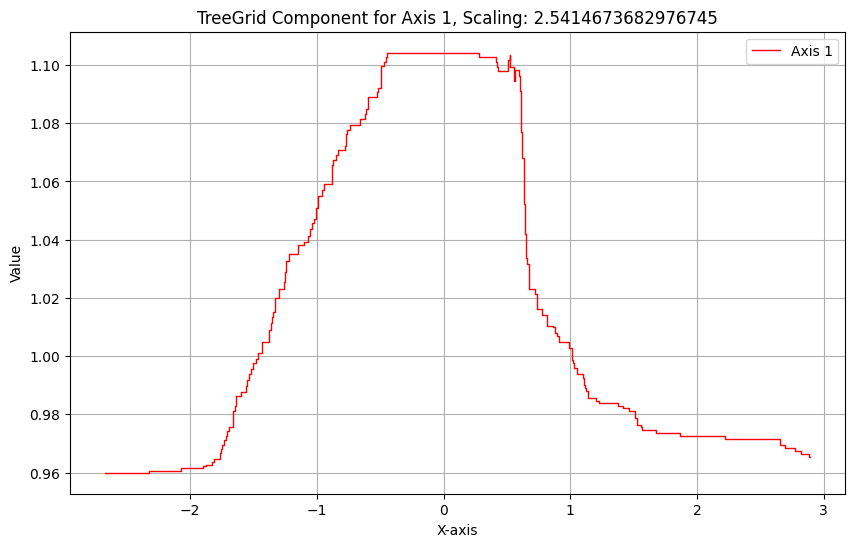

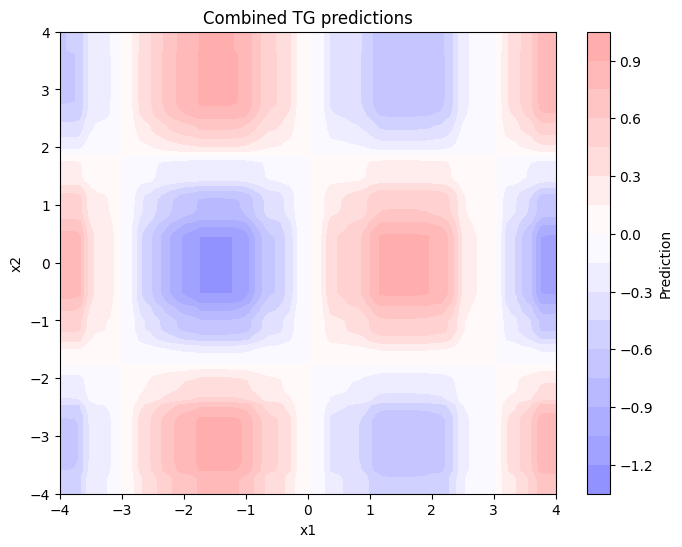

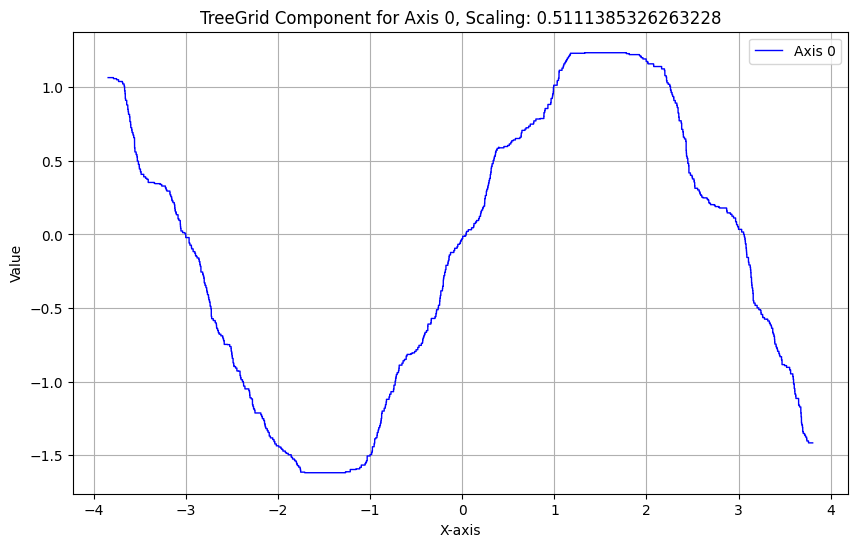

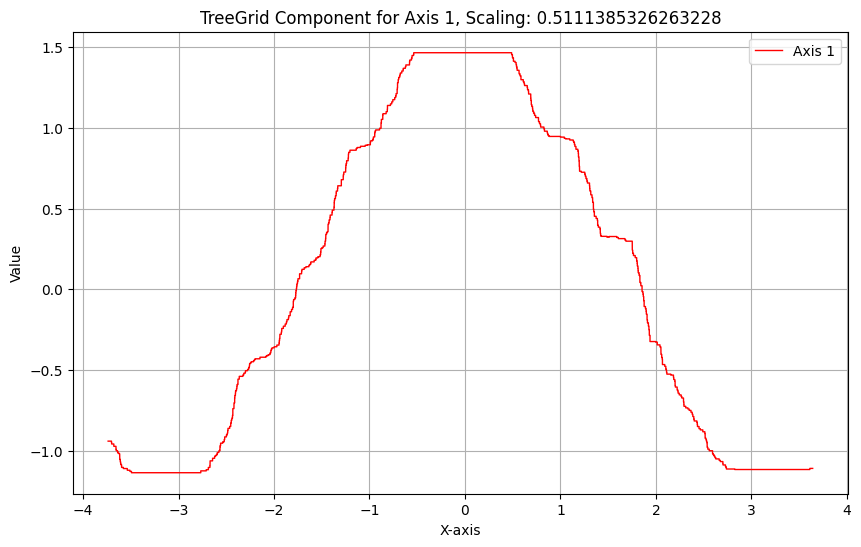

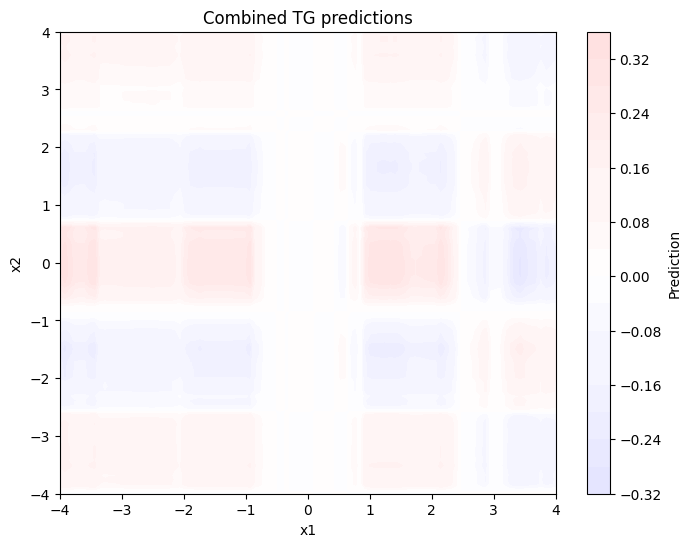

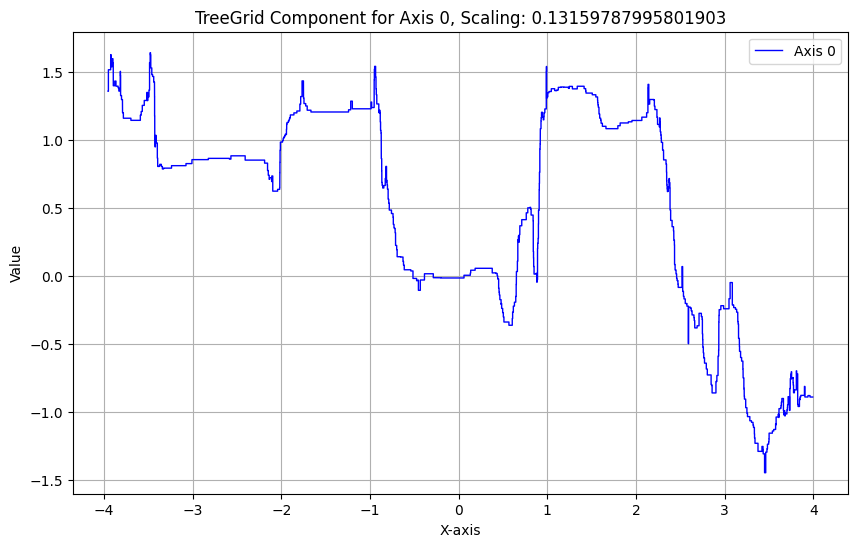

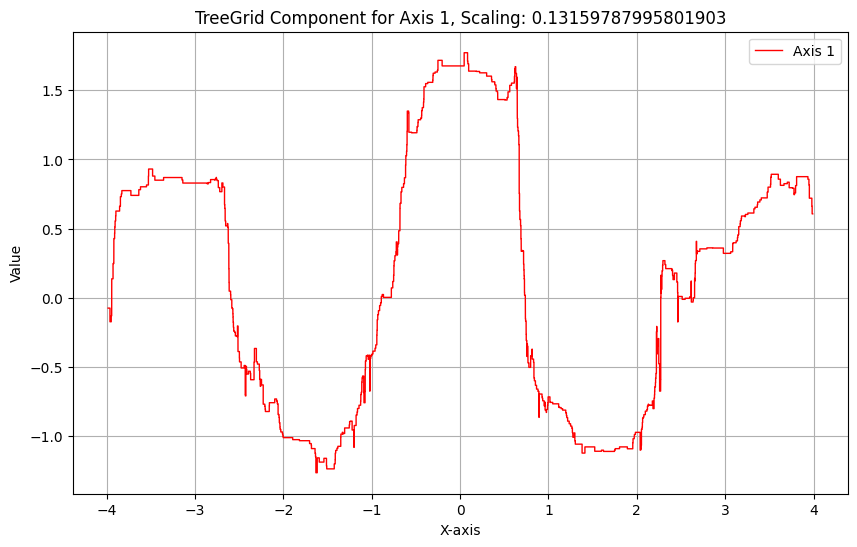

In [16]:
for tgf in model_arith_mean.tree_grid_families:
    combined_tg = mpf_py.TreeGrid(tgf.combined_tree_grid)
    plot_2d_model_predictions(lambda x: combined_tg.predict(x), title="Combined TG predictions")
    combined_tg.plot_components(True)


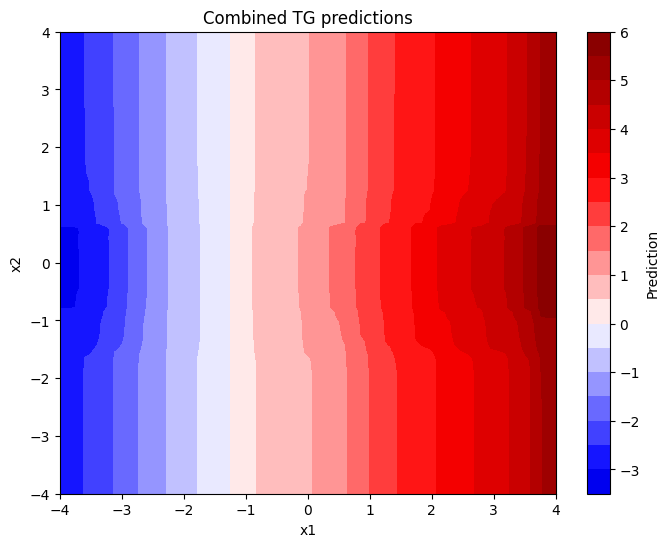

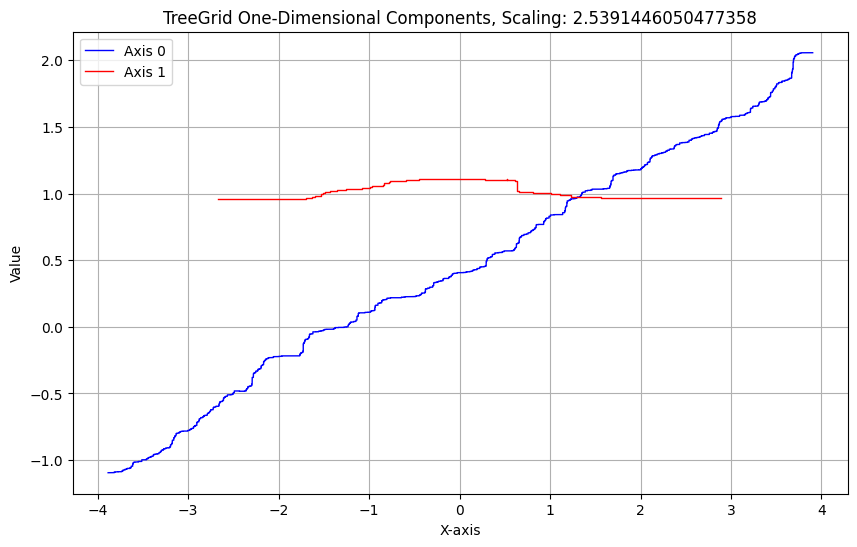

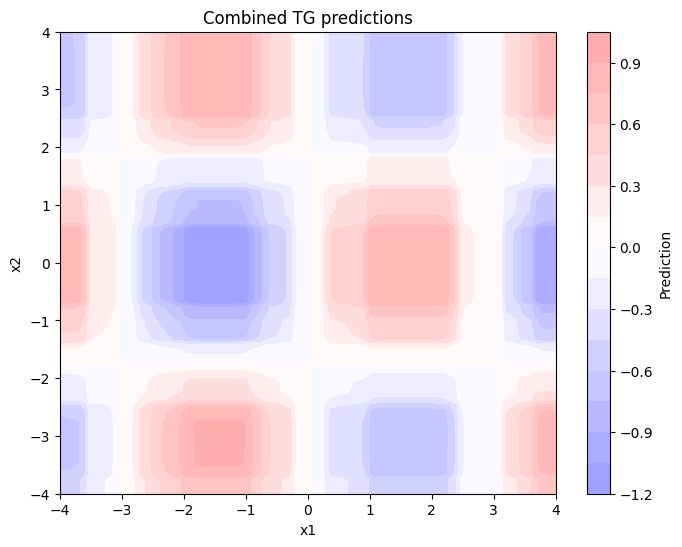

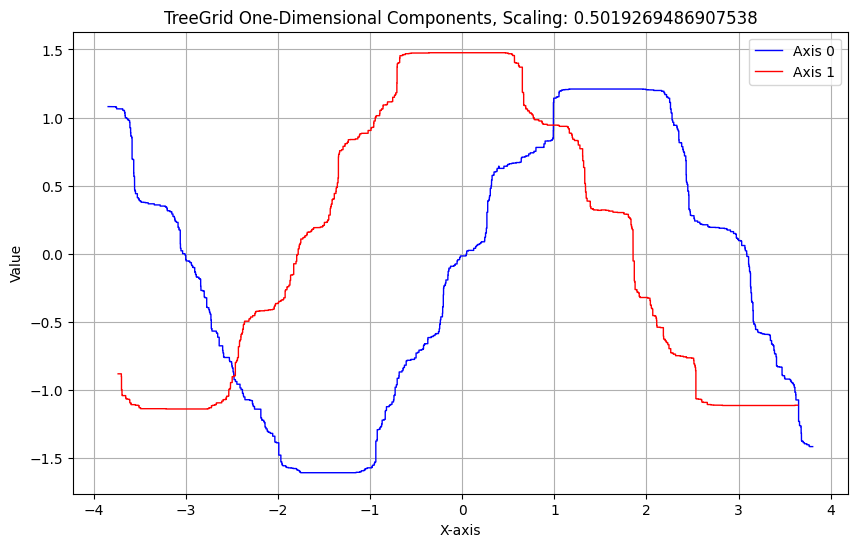

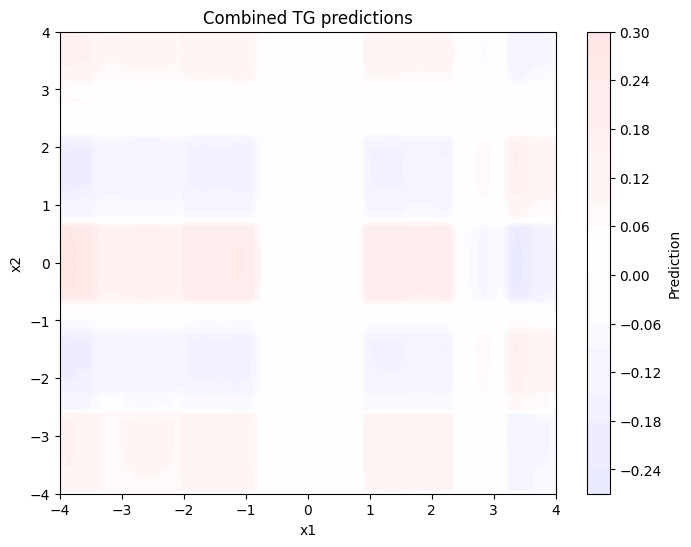

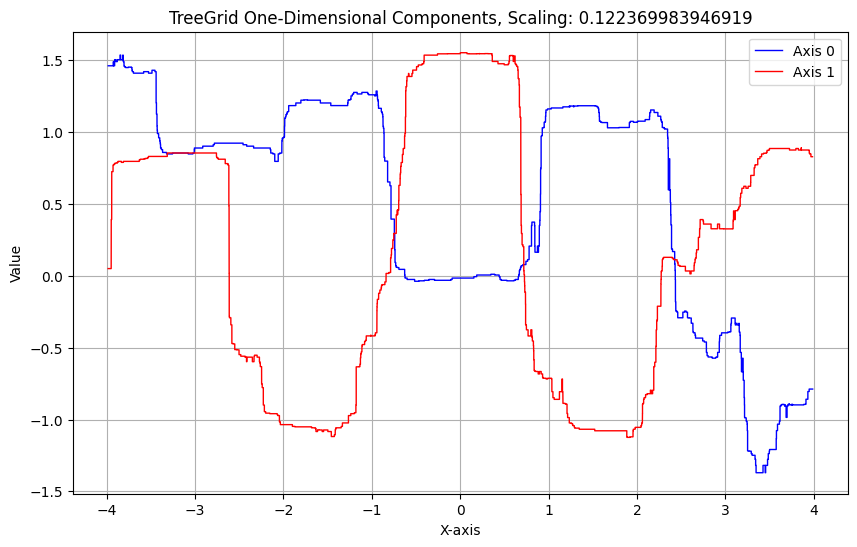

In [17]:
for tgf in model_median.tree_grid_families:
    combined_tg = mpf_py.TreeGrid(tgf.combined_tree_grid)
    plot_2d_model_predictions(lambda x: combined_tg.predict(x), title="Combined TG predictions")
    combined_tg.plot_components()
